<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-и-изучение-файлов" data-toc-modified-id="Чтение-и-изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение и изучение файлов</a></span></li><li><span><a href="#Проверка-правильности-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-изменения-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей" data-toc-modified-id="Обучение-разных-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<b>Привет! Прошу не стесняться указывать даже незначительные ошибки и возращать проект. Хочу чтобы ревью не было слишком легким!</b>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
!pip install install seaborn==0.11.1  --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import seaborn as sns
import importlib
import time

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [3]:
RAND_STATE = 12345

## Подготовка данных

### Чтение и изучение файлов

Путь к файлам:

/datasets/gold_recovery_train.csv.

/datasets/gold_recovery_test.csv.

/datasets/gold_recovery_full.csv.

In [4]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv', index_col = 'date')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv', index_col = 'date')
data_all = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv', index_col = 'date')

### Проверка правильности расчета эффективности обогащения 

Вычислим её на обучающей выборке для признака rougher.output.recovery. Формула для расчета следующая

<br>
( (C x (F - T)) / (F x (C - T)) ) x 100% <br>
C — доля золота в концентрате после флотации (<b>rougher.output.concentrate_au </b>) <br>
F — доля золота в сырье/концентрате до флотации (<b> rougher.input.feed_au </b>)<br>
T — доля золота в отвальных хвостах после флотации (<b>rougher.output.tail_au </b>)

Добавим новый столбец с расчетным значением в тренировочный датасет

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

data_train['rougher.output.recovery.calc'] = ((C * (F - T)) / (F * (C - T)) ) * 100

In [6]:
data_train[['rougher.output.recovery', 'rougher.output.recovery.calc']].head()

,rougher.output.recovery,rougher.output.recovery.calc
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794


In [7]:
rougher_mae = mean_absolute_error(data_train.dropna()['rougher.output.recovery.calc'], data_train.dropna()['rougher.output.recovery'])
print('MAE для концентрации золота после процесса флотации:', rougher_mae)

MAE для концентрации золота после процесса флотации: 9.555596961987514e-15


<b>Вывод:</b> MAE имеет очень маленькое значение, соответсвенно между нашим расчетом и датасетом практически нет разницы. Исходные данные верны. 

### Анализ признаков, недоступных в тестовой выборке

Посмотрим сначала на все столбцы в наших датасетах

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

Найдем разницу:

In [10]:
print('Столбцы, которые пристуствуют в тренировочных данных, но отсуствуют в тестовых:')
different_cols = set(data_train.columns) - set(data_test.columns)
display(different_cols)

Столбцы, которые пристуствуют в тренировочных данных, но отсуствуют в тестовых:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery.calc',
 'rougher.output.tail_ag',
 'rougher.out

Удалим их из тестовой выборки, чтобы верно построить модель в будущем

In [11]:
data_train.drop(different_cols, axis=1, inplace=True)

In [12]:
data_train.shape

(16860, 52)

In [13]:
data_test.shape

(5856, 52)

<b>Вывод:</b> Все стобцы, которые есть в тренировочной выборке, но отсутсвуют в тестовой относятся к параметрам, определяемым по ходу процесса, т.е. относятся либо к продукту (output), либо к расчету на основе данных продукта (calculation). Ввиду того, что наша модель должна строить предсказания по данным, доступным до начала технологического процесса, их следует удалить.

### Предобработка данных

In [14]:
data_train.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)
data_all.fillna(method='ffill', inplace=True)

In [15]:
display(data_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               16860 non-null  float64
 1   primary_cleaner.input.depressant            16860 non-null  float64
 2   primary_cleaner.input.feed_size             16860 non-null  float64
 3   primary_cleaner.input.xanthate              16860 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      16860 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    16860 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      16860 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    16860 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      16860 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    16860 non-nu

None

In [16]:
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5856 non-null   float64
 1   primary_cleaner.input.depressant            5856 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5856 non-null

None

In [17]:
data_train['rougher.output.recovery'] = data_all.loc[data_train.index, 'rougher.output.recovery']
data_train['final.output.recovery'] = data_all.loc[data_train.index, 'final.output.recovery']

data_test['rougher.output.recovery'] = data_all.loc[data_test.index, 'rougher.output.recovery']
data_test['final.output.recovery'] = data_all.loc[data_test.index, 'final.output.recovery']

## Анализ данных

### Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Чтобы построить график, зависимости от времени введом дополнительный столбец, в котором преобразуем наше индексное поле в формат даты-времени. Графики будем строить по датасету со всеми данными

In [18]:
data_all['date_time'] = pd.to_datetime(data_all.index.to_series(), format = '%Y-%m-%d %H:%M:%S')

Нам нужны следующие поля: rougher.input.feed_au(концентрация золота в сырье), rougher.output.concentrate_au (концентрация золота после флотации), primary_cleaner.output.concentrate_au (концентрация золота после очистки), final.output.concentrate_au (финальный концентрат).

Сделаем отдельный датасет на основе наших данных и применим к нему .melt() чтобы потом построить график.

Первый график будет показывать как меняется концентрация со временем

In [19]:
df_plot = data_all[['date_time', 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
df_plot = df_plot.melt('date_time', var_name='Этап', value_name='Концентрация')

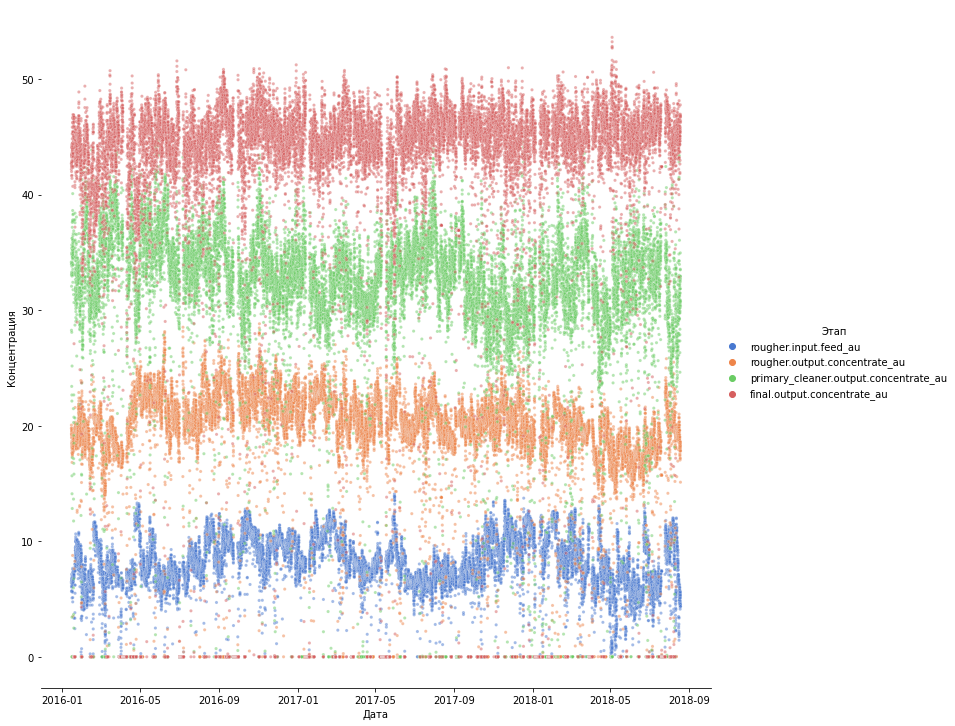

In [20]:
plot = sns.relplot(data=df_plot, x="date_time", y="Концентрация", hue="Этап", #size="size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, s=10, legend='full');
plot.despine(left=True);
plot.set_ylabels("Концентрация");
plot.set_xlabels("Дата");

Видно, что чем дальше производственный процесс по "цепочке", тем выше концентрация золота. Причем со временем тенденция не меняется. Бывают "просадки", но, если они есть, то их можно наблюдать на всех стадиях одновременно. Также есть аномальные значения в районе нуля или в местах графика, не характерных для этапов

Далее построим гистограммы распределения концентраций для каждого этапа

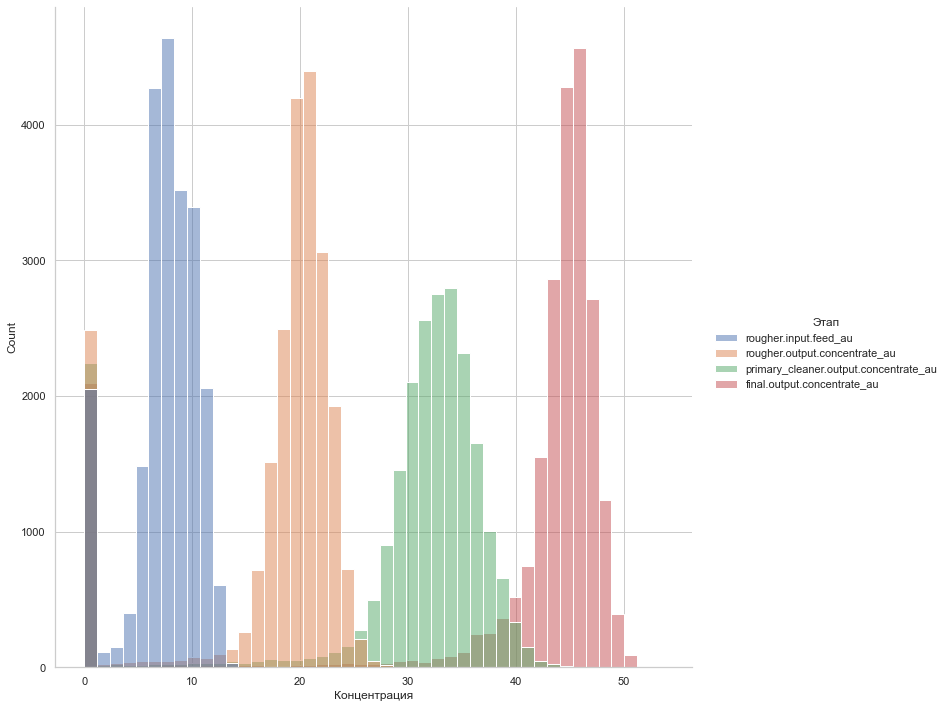

In [21]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=df_plot,
    x="Концентрация", hue="Этап",
    height=10,
    multiple="layer", 
);
plot.set_ylabels("Концентрация");
plot.set_xlabels("Количество");

Тут та же картина. Явно прослеживается повышение концентрации золота и видно вбросы.

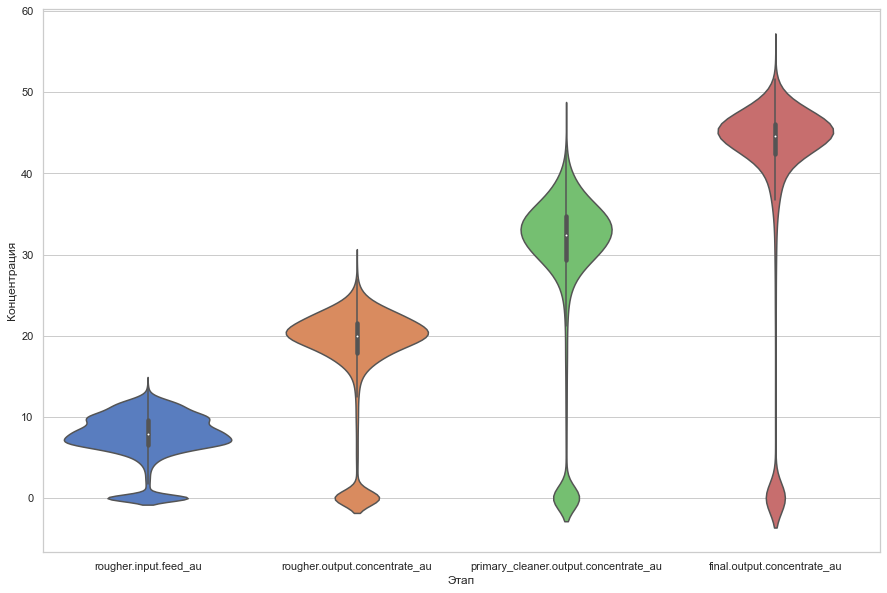

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=df_plot, x='Этап', y='Концентрация', palette='muted');

<b>Вывод:</b> По графику зависимости от времени, гистограммам и violin-диаграммам явно видно, что с каждым этапом производственного процесса концентрация золота повышается. Также явно видно наличиие некоторого процента аномальных данных (выбросов и нулей)

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Нужный нам столбец - rougher.input.feed_size. Это, по всей видимости, важный прараметр для результата производственных процессов и если в тестовых данных его распределение отличается от обучающих, то модель может делать предсказания неправильно

Для визуальной оценки построим две гистограммы

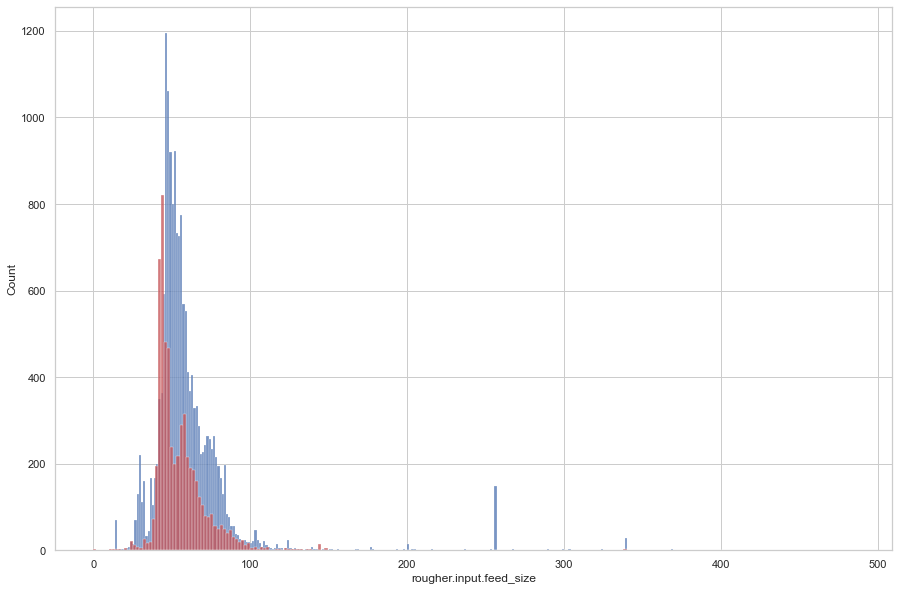

In [23]:
#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(
    data=data_train,
    x='rougher.input.feed_size',
    color='b',
    ax=ax
);

sns.histplot(
    data=data_test,
    x='rougher.input.feed_size',
    color='r',
    ax=ax
);

<b>Вывод:</b> По графикам видно, что распределение примерно одинаковое

### Исследование суммарной концентрации всех веществ на разных стадиях

Нам нужны концентрации в сырье, в черновом и финальном концентратах. Вещества: au, ag, pb и sol

Сырье:<br>
<i>rougher.input.feed_ag<br>
rougher.input.feed_pb<br>
rougher.input.feed_sol<br>
rougher.input.feed_au <br></i>

Ченовой концентрат:<br>
<i>rougher.output.concentrate_ag<br>
rougher.output.concentrate_pb<br>
rougher.output.concentrate_sol<br>
rougher.output.concentrate_au<br></i>

Финальный концентрат: <br>
<i>final.output.concentrate_ag<br>
final.output.concentrate_pb<br>
final.output.concentrate_sol<br>
final.output.concentrate_au<br> </i>

In [24]:
rougher_input_cols = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']
rougher_output_cols = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']
final_output_cols = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']

data_concentration_sum = pd.DataFrame()
data_concentration_sum['Сырье'] = data_all[rougher_input_cols].sum(axis=1)
data_concentration_sum['Черновой'] = data_all[rougher_output_cols].sum(axis=1)
data_concentration_sum['Финальный'] = data_all[final_output_cols].sum(axis=1)

data_concentration_sum = data_concentration_sum.melt(var_name='Этап', value_name='Суммарная концентрация')

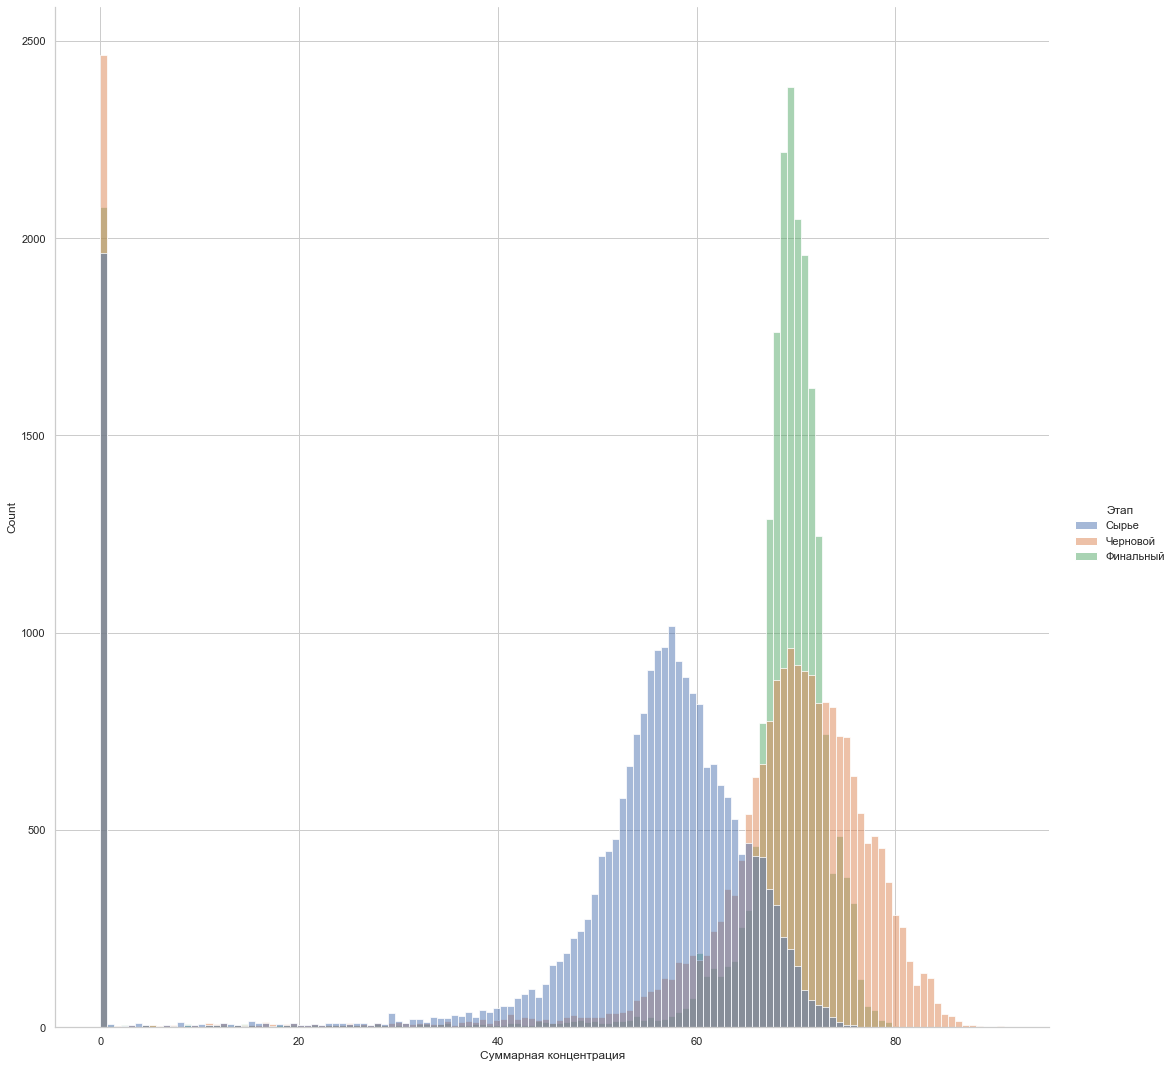

In [25]:
sns.displot(
    data=data_concentration_sum,
    x="Суммарная концентрация", hue="Этап",
    height=15,
    multiple="layer", 
);

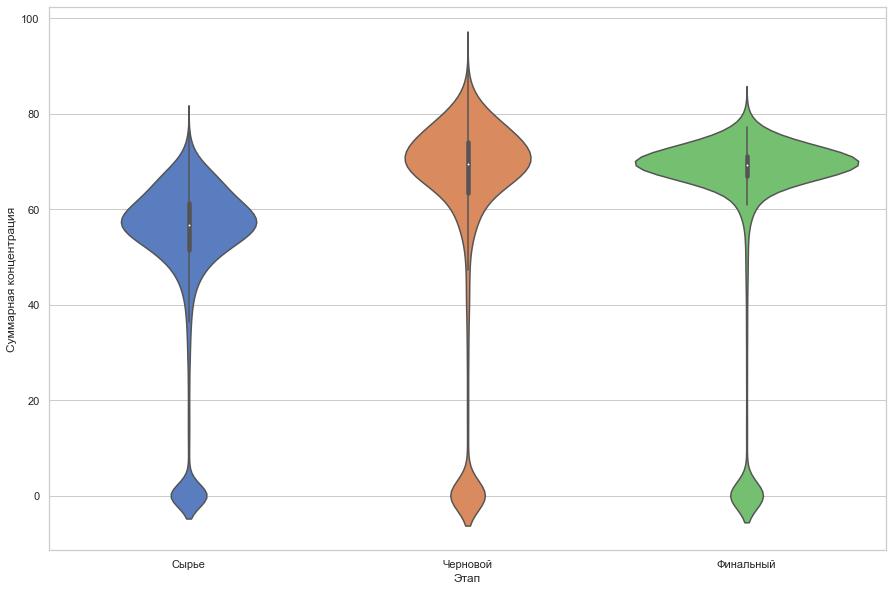

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(data=data_concentration_sum, x='Этап', y='Суммарная концентрация', palette='muted');

In [27]:
data_all['rougher.input.sum'] = data_all[rougher_input_cols].sum(axis=1)
data_all['rougher.otput.sum'] = data_all[rougher_output_cols].sum(axis=1) 
data_all['final.output.cols'] = data_all[final_output_cols].sum(axis=1)

In [28]:
train_size_all = data_train.shape[0]
test_size_all = data_test.shape[0]

По графикам видно, что все "хвосты" и аномалии находятся ниже уровня 10. Для того чтобы удалить эти строки из тренировочной выборки добавим в нее столбцы из полного датасета по индекасам, удалим строки, в которых суммарные концентрации для каждого этапа меньше 10, а потом удалим новые столбцы, чтобы не портить модель.

In [29]:
cols_for_drop = ['rougher.input.sum', 'rougher.otput.sum', 'final.output.cols']
concentrate_to_drop = 10
for col in cols_for_drop:
    data_train[col] = data_all.loc[data_train.index, col]
    #data_test[col] = data_all.loc[data_test.index, col]
    indexes_to_drop_train = data_train[data_train[col] < concentrate_to_drop].index
    #`indexes_to_drop_test = data_test[data_test[col] < concentrate_to_drop].index
    data_train.drop(indexes_to_drop_train, inplace=True)
    #data_test.drop(indexes_to_drop_test, inplace=True)
    data_train.drop(col, axis=1, inplace=True)
    #data_test.drop(col, axis=1, inplace=True)
    data_test

In [30]:
train_size_drop = data_train.shape[0]
test_size_drop = data_test.shape[0]
print('Размер полной тренировоченой выборки: ', train_size_all, 'после удаления выбросов: ', train_size_drop, 'процент изменения: ', (100 - train_size_drop*100/train_size_all ))
#print('Размер полной тестовой выборки: ', test_size_all, 'после удаления выбросов: ', test_size_drop, 'процент изменения: ', (100 - test_size_drop*100/test_size_all ))

Размер полной тренировоченой выборки:  16860 после удаления выбросов:  14550 процент изменения:  13.70106761565836


<b>Вывод:</b> Все выбросы находятся примерно на уровне 10. Мы удалили все строки из тренировочной выборки, которые соответсвуют этим показателям, но не трогали тестовую, чтобы приблизить обучение модели к реальным данным на проде

## Модель

### Функция для вычисления итоговой sMAPE.


In [31]:
def smape(target, prediction):
    return (1/len(target)) * np.sum((np.abs(target-prediction)/((np.abs(target)+np.abs(prediction))/2))*100)

In [32]:
def smape_total(smape_rougher, smape_final):
    return .25*smape_rougher + .75*smape_final

### Обучение разных моделей

Для начала составим базу моделей, которые собираемся применять, также обозначим гиперпараметры для подбора гридсерчем

In [33]:
data_models = [
               ['Линейная регрессия','sklearn.linear_model','LinearRegression', 
                {}],
               ['Лассо','sklearn.linear_model','Lasso', 
                {}],
               ['Ридж-регрессия','sklearn.linear_model','Ridge', 
                {}],
               ['Дерево решений', 'sklearn.tree','DecisionTreeRegressor',
                {'max_depth':range (1, 50, 1)}],
               ['Случайный лес','sklearn.ensemble','RandomForestRegressor',
                { 'n_estimators': range (20, 80, 10),
                  'max_depth': range (1, 21, 2),
                  #'max_features' : ['auto', 'sqrt', 'log2']
                }]
               ]    
models_df = pd.DataFrame(data_models, columns = ['label','module','model', 'parameters'])
models_df

,label,module,model,parameters
0,Линейная регрессия,sklearn.linear_model,LinearRegression,{}
1,Лассо,sklearn.linear_model,Lasso,{}
2,Ридж-регрессия,sklearn.linear_model,Ridge,{}
3,Дерево решений,sklearn.tree,DecisionTreeRegressor,"{'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ..."
4,Случайный лес,sklearn.ensemble,RandomForestRegressor,"{'n_estimators': (20, 30, 40, 50, 60, 70), 'ma..."


Теперь напишем функцию для перебора моделей в цикле. Также сделаем свой scorer, который будет отражать метрику sMAPE при определении оптимальных гиперпараметров

In [41]:
def choose_model(features_train, target_train, features_test, target_test):
    data_result = []
    for index, row in models_df.iterrows():
        #загружаем класс модели
        ModelClass = getattr(importlib.import_module(row['module']), row['model'])
        model = ModelClass()

        #подбираем параметры гридсерчем по метрике sMAPE, задав свой скорер
        print('Тестируем модель', row['label'], '...')
        my_scorer = make_scorer(smape, greater_is_better=False)
        grid = GridSearchCV(model, row['parameters'], cv=5, scoring=my_scorer, n_jobs=-1)
        grid.fit(features_train, target_train)
        start_time = time.time()
        
        #инициализируем модель с подобранными параметрами
        #чтобы не проверять у какой модели есть параметр random_state а у какого нет
        try:
            model = ModelClass(**grid.best_params_, random_state=rand_state)
        except:
            model = ModelClass(**grid.best_params_)
            
        #обучаем на тренировочных данных
        try:
            model.fit(features_train, target_train, random_state=rand_state)
        except:
            model.fit(features_train, target_train)

        #вычисляем SMAPE на тестовых данных
        predicted_test = model.predict(features_test)
        smape_score = smape(target_test, predicted_test)
        exec_time = time.time() - start_time
        
        data_result.append([smape_score, exec_time, row['label'], row['module'], row['model'], grid.best_params_])
        print(row['label'], 'готово за ', exec_time, '. Лучший sMAPE', smape_score) 
        print('')
    data_result = pd.DataFrame(data_result, columns = ['SMAPE','exec_time','label', 'module','model', 'optimal_parameters'])
    return data_result


Напишем функцию, которая будет отбирать фичи только для нужного нам процесса по фильтру названия

In [35]:
def take_process_df(df, process_name):
    cols = list(filter(lambda k: process_name in k, set(df.columns)))
    return df[cols]

Сделаем дополнительные выборки по фичам и таргетам для двух моделей

После флотации <i>rougher</i>:

In [36]:
data_train_rougher = take_process_df(data_train, 'rougher')
data_test_rougher = take_process_df(data_test, 'rougher')
print(data_train_rougher.shape)
print(data_test_rougher.shape)

data_train_rougher_target = data_train_rougher['rougher.output.recovery']
data_train_rougher_features = data_train_rougher.drop('rougher.output.recovery', axis=1)

data_test_rougher_target = data_test_rougher['rougher.output.recovery']
data_test_rougher_features = data_test_rougher.drop('rougher.output.recovery', axis=1)

(14550, 23)
(5856, 23)


Финальный результат <i>'cleaner'</i>:

In [37]:
data_train_final = take_process_df(data_train, 'cleaner')
data_test_final = take_process_df(data_test, 'cleaner')
print(data_train_final.shape)
print(data_test_final.shape)

data_train_final_target = data_train['final.output.recovery']
data_train_final_features = data_train_final

data_test_final_target = data_test['final.output.recovery']
data_test_final_features = data_test_final

(14550, 30)
(5856, 30)


In [38]:
data_train_rougher_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14550 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.state.floatbank10_e_air     14550 non-null  float64
 1   rougher.state.floatbank10_d_air     14550 non-null  float64
 2   rougher.state.floatbank10_c_level   14550 non-null  float64
 3   rougher.state.floatbank10_a_level   14550 non-null  float64
 4   rougher.input.floatbank10_xanthate  14550 non-null  float64
 5   rougher.input.feed_au               14550 non-null  float64
 6   rougher.input.floatbank11_sulfate   14550 non-null  float64
 7   rougher.input.feed_sol              14550 non-null  float64
 8   rougher.state.floatbank10_b_level   14550 non-null  float64
 9   rougher.state.floatbank10_e_level   14550 non-null  float64
 10  rougher.state.floatbank10_a_air     14550 non-null  float64
 11  rougher.input.

In [39]:
data_train_final_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14550 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.state.floatbank8_c_air      14550 non-null  float64
 1   primary_cleaner.state.floatbank8_d_level    14550 non-null  float64
 2   primary_cleaner.input.feed_size             14550 non-null  float64
 3   secondary_cleaner.state.floatbank3_b_level  14550 non-null  float64
 4   primary_cleaner.state.floatbank8_b_level    14550 non-null  float64
 5   secondary_cleaner.state.floatbank3_b_air    14550 non-null  float64
 6   secondary_cleaner.state.floatbank6_a_air    14550 non-null  float64
 7   primary_cleaner.state.floatbank8_a_air      14550 non-null  float64
 8   secondary_cleaner.state.floatbank3_a_level  14550 non-null  float64
 9   secondary_cleaner.state.floatbank5_b_air    14550 non-nu

Теперь подберем модели

In [42]:
models_result_rougher = choose_model(data_train_rougher_features, data_train_rougher_target, data_test_rougher_features, data_test_rougher_target)

Тестируем модель Линейная регрессия ...
Линейная регрессия готово за  0.019947528839111328 . Лучший sMAPE 11.00280107291326

Тестируем модель Лассо ...
Лассо готово за  0.03390979766845703 . Лучший sMAPE 10.750028702166325

Тестируем модель Ридж-регрессия ...
Ридж-регрессия готово за  0.003987312316894531 . Лучший sMAPE 11.002788794998521

Тестируем модель Дерево решений ...
Дерево решений готово за  0.05784201622009277 . Лучший sMAPE 9.212972612219046

Тестируем модель Случайный лес ...
Случайный лес готово за  0.9793870449066162 . Лучший sMAPE 10.957714599773885



In [43]:
models_result_final = choose_model(data_train_final_features, data_train_final_target, data_test_final_features, data_test_final_target)

Тестируем модель Линейная регрессия ...
Линейная регрессия готово за  0.016989469528198242 . Лучший sMAPE 12.257112618323701

Тестируем модель Лассо ...
Лассо готово за  0.030919313430786133 . Лучший sMAPE 12.109327368719246

Тестируем модель Ридж-регрессия ...
Ридж-регрессия готово за  0.005983591079711914 . Лучший sMAPE 12.257049988656224

Тестируем модель Дерево решений ...
Дерево решений готово за  0.04386711120605469 . Лучший sMAPE 11.772687661993164

Тестируем модель Случайный лес ...
Случайный лес готово за  0.4806966781616211 . Лучший sMAPE 11.75254728770507



In [44]:
models_result_rougher.sort_values(by = 'SMAPE', ascending=True, inplace=True)
models_result_rougher

,SMAPE,exec_time,label,module,model,optimal_parameters
3,9.212973,0.057842,Дерево решений,sklearn.tree,DecisionTreeRegressor,{'max_depth': 2}
1,10.750029,0.033910,Лассо,sklearn.linear_model,Lasso,{}
4,10.957715,0.979387,Случайный лес,sklearn.ensemble,RandomForestRegressor,"{'max_depth': 3, 'n_estimators': 20}"
2,11.002789,0.003987,Ридж-регрессия,sklearn.linear_model,Ridge,{}
0,11.002801,0.019948,Линейная регрессия,sklearn.linear_model,LinearRegression,{}


In [45]:
print('Лучший показатель sMAPE для чернового концентрата: ', models_result_rougher.iloc[0]['SMAPE'])
print('Лучшая модель для предсказания чернового концентрата: ', models_result_rougher.iloc[0]['label'])
print('Гиперпараметры для модели чернового концентрата: ', models_result_rougher.iloc[0]['optimal_parameters'])

Лучший показатель sMAPE для чернового концентрата:  9.212972612219046
Лучшая модель для предсказания чернового концентрата:  Дерево решений
Гиперпараметры для модели чернового концентрата:  {'max_depth': 2}


In [46]:
models_result_final.sort_values(by = 'SMAPE', ascending=True, inplace=True)
models_result_final

,SMAPE,exec_time,label,module,model,optimal_parameters
4,11.752547,0.480697,Случайный лес,sklearn.ensemble,RandomForestRegressor,"{'max_depth': 1, 'n_estimators': 20}"
3,11.772688,0.043867,Дерево решений,sklearn.tree,DecisionTreeRegressor,{'max_depth': 1}
1,12.109327,0.030919,Лассо,sklearn.linear_model,Lasso,{}
2,12.257050,0.005984,Ридж-регрессия,sklearn.linear_model,Ridge,{}
0,12.257113,0.016989,Линейная регрессия,sklearn.linear_model,LinearRegression,{}


In [47]:
print('Лучший показатель sMAPE для финального концентрата: ', models_result_final.iloc[0]['SMAPE'])
print('Лучшая модель для предсказания финального концентрата: ', models_result_final.iloc[0]['label'])
print('Гиперпараметры для модели финального концентрата: ', models_result_final.iloc[0]['optimal_parameters'])

Лучший показатель sMAPE для финального концентрата:  11.75254728770507
Лучшая модель для предсказания финального концентрата:  Случайный лес
Гиперпараметры для модели финального концентрата:  {'max_depth': 1, 'n_estimators': 20}


In [48]:
print('Итоговый показатель sMAPE для двух этапов', smape_total(models_result_rougher.iloc[0]['SMAPE'], models_result_final.iloc[0]['SMAPE']))

Итоговый показатель sMAPE для двух этапов 11.117653618833565


## Вывод

В процессе выполнения проекта мы подготовили прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. 

Мы попытались предсказать результат деятельности золотодобывающего предприятия на разных этапах производства в соответсвии с технологическим процессом и заданными метриками.

Чтобы успешно выполнить задание нам пришлось не только обучить модели, но и тщательно проанализировать предоставленные данные.

В результате размер итоговой метрики sMAPE для двух этапов составил 11.1%

Рекомендации по применяемым моделям:
- этап чернового концентрата: Дерево решений ({'max_depth': 2}), метрика sMAPE = 9.2%
- этап финального концентрата: Случайный лес ({'max_depth': 1, 'n_estimators': 70}), метрика sMAPE = 11.7%